In [98]:
!pwd

/Users/macbook/divtel


In [99]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import sys
from ipywidgets import interactive, FloatSlider, interact, fixed
from divtel import *
import copy
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_sky
from astroplan import FixedTarget
#from . import utils
#from .const import COLORS
#from . import pointing

from matplotlib.transforms import Affine2D
from astropy.visualization.wcsaxes import SphericalCircle

import healpy as hp
import tqdm

#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## LOAD CTA CONFIG

In [100]:
cta = CTA_Info('south')

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2025-01-23T23:46:04.882


In [101]:
# Note that if the radius is in meters, 
# you can set LoadConfig(file, radius="meters")
# defalut is in degrees

array = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)


## Check configuration table

In [102]:
array.table.units = "deg"
array.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


In [103]:
table=array.table

## Check the telescope spatial distribution
This is useful to pick the groups

In [104]:
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


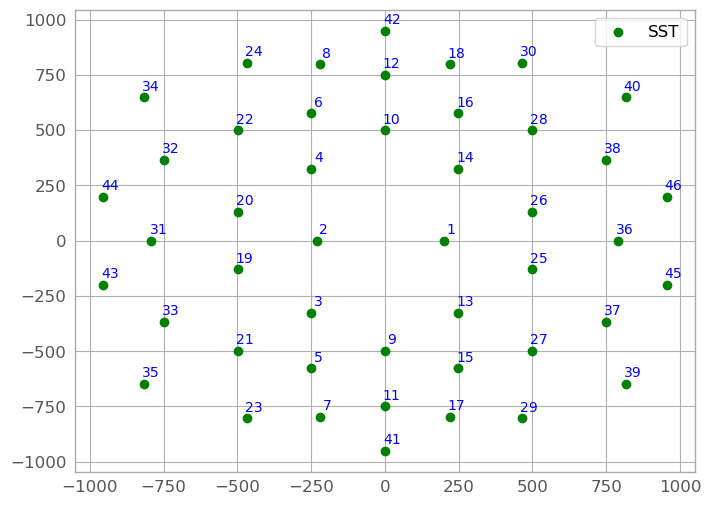

In [105]:
# Loop through all the telescopes
#for fov in array.table["fov"]:
#    print(fov)
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
for i in range(len(array.table)):
    plt.scatter(array.table['x'][i], array.table['y'][i], c=colors[i], label=fov_labels[colors[i]])

    # Annotate each point with the telescope ID
    #matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)
#Annotate the point xy with text text.
#In the simplest form, the text is placed at xy.
    plt.annotate(str(array.table["id"][i]),
                 (array.table['x'][i], array.table['y'][i]),  # Point position
                 textcoords="offset points",  # Text position relative to the point
                 xytext=(5, 5),  # Offset in pixels (to avoid overlapping the point)
                 ha='center', fontsize=10, color='blue')
handles, labels = plt.gca().get_legend_handles_labels()
#handles, labels like this is doing
    #plt.gca() gets the current Axes object, which is where your plot is
    #.get_legend_handles_labels()
        #handles: Returns a list of the graphical elements (e.g., lines, scatter plot points) that would appear in the legend.
        # labels: Returns the text labels associated with each graphical element in handles

by_label = dict(zip(labels, handles))  # Remove duplicate labels, the dictionary by the structure takes out the double 
plt.legend(by_label.values(), by_label.keys())
#by_label.values This is pulling out the unique graphical elements
# by_label.keys  This is retrieving the unique text 
plt.savefig("./different_telescopes.png", dpi=300, bbox_inches="tight")
plt.show() 

## Check the hyper field of view (hFoV)

This is the whole telescope array hFoV maybe? (ask)

In [106]:
array.hFoV(m_cut=3) 

46it [00:07,  6.30it/s]


(62.238869377690584, 46.0)

In [107]:
#array.hFoV(m_cut=3)

## Grouping telescopes

In [108]:


sub_groups = {'1':[44,32,21],
             '2':[43,35,3],
              '3':[33,23,5],
              '4':[34,24,20],
              '5':[19,22,14,13],
              '6':[31,6,2],
              '7':[7,12,39],
              '8':[41,4,18],
              '9':[8,16,26],
              '10':[42,10,28],
              '11':[9,30,40],
              '12':[11,36,37],
              '13':[17,15,27],
              '14':[1,38,45],
              '15':[25,29,46]
              
             }
sub_groups_2 = {'1':[44,35,5], 
             '2':[43,32,24],
              '3':[34,42,3],
              '4':[10,20,28],
              '5':[19,22,14,13],
              '6':[31,6,2],
              '7':[7,12,39],
              '8':[41,4,18],
              '9':[8,16,26],
              '10':[33,15,23],
              '11':[9,30,40],
              '12':[11,36,37],
              '13':[17,21,27],
              '14':[1,38,45],
              '15':[25,29,46]
             }
sub_groups_3={}
sub_groups_4={}
sub_groups_5={}
sub_groups_6={}
##sub_groups_3={'1':[18,14,13,17],
#             '2':[7,11,15],
#             '3':[5,8,9,12],
#             '4':[16,6,10]}


In [109]:
def compute_center_of_gravity(group):
    x, y, z = group['x'], group['y'], group['z']
    cog_x = round(np.mean(x),2)
    cog_y = round(np.mean(y),2)
    cog_z = round(np.mean(z),2)
    return cog_x, cog_y, cog_z

# Function to create new telescope list with center of gravity
def create_new_group_list(tel_group):
    new_telescopes = []
    for group in tel_group.groups:
        print(tel_group.groups)
        print (group['focal'][0],round(group['radius'][0],2))
        #id_ = group["id"][0]
        cog = compute_center_of_gravity(group)
        focal, fov = group['focal'][0], round(group['radius'][0],2)  # Assuming same within a group
        new_telescopes.append([*cog, focal, fov])
    return new_telescopes


In [110]:
tel_group_2, labels_2, number_of_telescopes_subarray_2 =array.group_by(sub_groups_2)
#tel_group_3, labels_3 = group_by(array, group=only_MST)

In [111]:
tel_group, labels, number_of_telescopes_subarray_1 =array.group_by(sub_groups)

In [112]:
# Step 2: Create new telescope list with center of gravity
new_telescopes = create_new_group_list(tel_group)
new_telescopes_2 = create_new_group_list(tel_group_2)
#new_telescopes_3 = create_new_group_list(tel_group_3)
#Why are you creating an extra telescope?


<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3 

In [113]:
# Define the file path where you want to save the output
output_file_path = './SST_file_1.txt'

# Open the file in write mode
with open(output_file_path, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path}")


New telescope data has been written to ./SST_file_1.txt


In [114]:
print(list(enumerate(new_telescopes_2)))

[(0, [-673.67, -342.0, 50.42, 5.6, 4.45]), (1, [-723.0, 324.0, 24.58, 5.6, 4.45]), (2, [-355.33, 424.33, 26.42, 5.6, 4.45]), (3, [0.0, 376.0, 16.58, 5.6, 4.45]), (4, [-125.0, 92.25, 21.38, 5.6, 4.45]), (5, [-423.33, 192.33, 20.42, 5.6, 4.45]), (6, [198.67, -232.0, 40.75, 5.6, 4.45]), (7, [-9.67, 57.33, 39.25, 5.6, 4.45]), (8, [176.0, 501.33, 12.42, 5.6, 4.45]), (9, [-321.67, -582.67, 57.25, 5.6, 4.45]), (10, [427.33, 317.67, 31.92, 5.6, 4.45]), (11, [512.67, -372.0, 23.58, 5.6, 4.45]), (12, [73.33, -598.33, 48.58, 5.6, 4.45]), (13, [634.0, 56.0, 10.08, 5.6, 4.45]), (14, [640.0, -245.0, 23.92, 5.6, 4.45])]


In [115]:
# Define the file path where you want to save the output
output_file_path_2 = './SST_2.txt'

# Open the file in write mode
with open(output_file_path_2, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes_2):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path_2}")


New telescope data has been written to ./SST_2.txt


## GRAPHING MULTIPLICITY AND FOV to understand what is going on 

In [116]:
array_SST= LoadConfig('./SST_file_1.txt', frame=cta, pointing2src=True)
full_array_SST = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)
array_SST_2= LoadConfig('./SST_2.txt', frame=cta, pointing2src=True)

#array_3= LoadConfig("./subarray_3_SOUTH.txt", frame=cta, pointing2src=True)

In [117]:
array_SST.table[:5]

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,rad,rad,rad,m,m,rad2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-734.0,22.33,33.08,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,736.43
2,-673.67,-390.67,51.42,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,779.78
3,-487.67,-582.67,61.58,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,760.21
4,-594.0,527.33,18.58,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,797.25
5,-125.0,92.25,21.38,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,158.43


In [118]:
array_SST.divergent_pointing(0.01, az=0,alt=70)

15it [00:02,  6.48it/s]
15it [00:02,  6.38it/s]


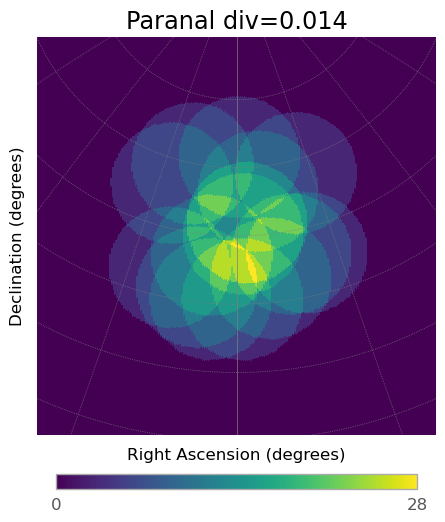

15it [00:02,  6.66it/s]
15it [00:02,  6.70it/s]


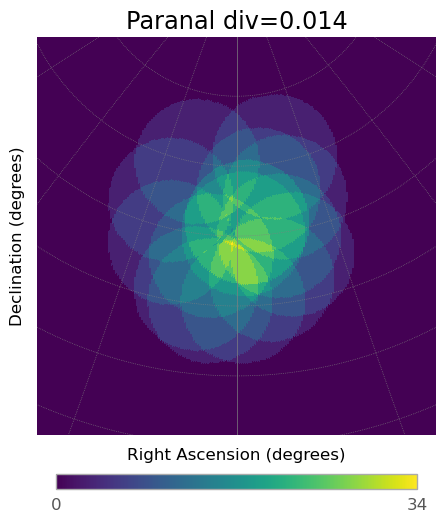

46it [00:07,  6.29it/s]
46it [00:07,  6.56it/s]


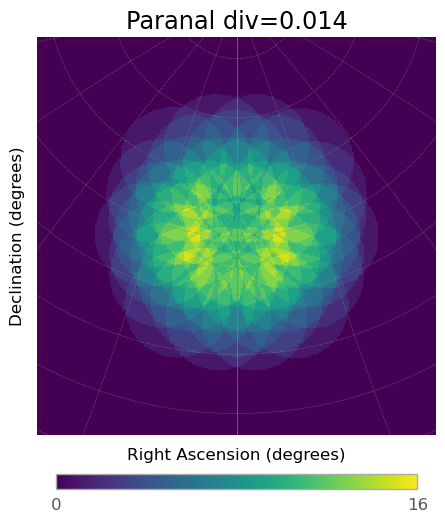

In [119]:
array_SST.divergent_pointing(0.014, az=0,alt=70)
array_SST_2.divergent_pointing(0.014, az=0,alt=70)
full_array_SST.divergent_pointing(0.014, az=0,alt=70)
array_SST.multiplicity_plot(number_of_telescopes_subarray_1)
array_SST_2.multiplicity_plot(number_of_telescopes_subarray_2)
full_array_SST.multiplicity_plot()



In [120]:
div=[]

div=np.linspace(0,0.02, 8)


In [121]:
FoV_full_array=[]
multiplicity_full_array=[]
for divergence in div:
    full_array_SST.divergent_pointing(divergence, az=0,alt=70)
    FoV=full_array_SST.hFoV(m_cut=3)[0]
    multiplicity=full_array_SST.hFoV(m_cut=3)[1]
    FoV_full_array.append(FoV)
    multiplicity_full_array.append(multiplicity)
  

46it [00:07,  5.96it/s]
46it [00:06,  6.71it/s]
46it [00:06,  6.65it/s]
46it [00:07,  6.48it/s]
46it [00:07,  6.57it/s]
46it [00:06,  6.70it/s]
46it [00:06,  6.64it/s]
46it [00:06,  6.87it/s]
46it [00:06,  6.82it/s]
46it [00:06,  6.86it/s]
46it [00:06,  6.79it/s]
46it [00:06,  6.93it/s]
46it [00:06,  6.75it/s]
46it [00:06,  6.98it/s]
46it [00:06,  6.97it/s]
46it [00:06,  6.73it/s]


In [122]:
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


In [123]:
FoV_array=[]
multiplicity_array=[]

for divergence in div:
    array_SST.divergent_pointing(divergence, az=0,alt=70)
    FoV=array_SST.hFoV(subarray_mult=number_of_telescopes_subarray_1)[0]
    multiplicity=array_SST.hFoV(subarray_mult=number_of_telescopes_subarray_1)[1]
    FoV_array.append(FoV)
    multiplicity_array.append(multiplicity)
   

15it [00:02,  6.97it/s]
15it [00:02,  7.15it/s]
15it [00:02,  6.99it/s]
15it [00:02,  5.70it/s]
15it [00:02,  6.74it/s]
15it [00:02,  6.81it/s]
15it [00:02,  7.02it/s]
15it [00:02,  7.09it/s]
15it [00:02,  6.71it/s]
15it [00:02,  6.87it/s]
15it [00:02,  7.17it/s]
15it [00:02,  7.07it/s]
15it [00:02,  6.78it/s]
15it [00:02,  7.16it/s]
15it [00:02,  6.86it/s]
15it [00:02,  6.93it/s]


In [124]:
FoV_array_2=[]
multiplicity_array_2=[]
for divergence in div:
    array_SST_2.divergent_pointing(divergence, az=0,alt=70)
    FoV=array_SST_2.hFoV(subarray_mult=number_of_telescopes_subarray_2)[0]
    multiplicity=array_SST_2.hFoV(subarray_mult=number_of_telescopes_subarray_2)[1]
    FoV_array_2.append(FoV)
    multiplicity_array_2.append(multiplicity)
     

15it [00:02,  6.52it/s]
15it [00:02,  6.18it/s]
15it [00:02,  6.82it/s]
15it [00:02,  6.86it/s]
15it [00:02,  6.86it/s]
15it [00:02,  7.00it/s]
15it [00:02,  6.94it/s]
15it [00:02,  6.93it/s]
15it [00:02,  7.09it/s]
15it [00:02,  6.68it/s]
15it [00:02,  6.85it/s]
15it [00:02,  7.04it/s]
15it [00:02,  6.70it/s]
15it [00:02,  7.14it/s]
15it [00:02,  6.88it/s]
15it [00:02,  6.58it/s]


15it [00:02,  6.75it/s]
15it [00:02,  7.10it/s]


FoV 238.81838395219623
Multiplicity 11.977321399154357


15it [00:02,  7.27it/s]
15it [00:02,  7.14it/s]


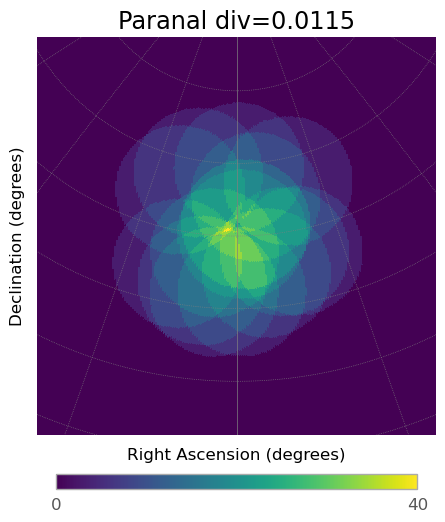

In [171]:
array_SST.divergent_pointing(div=0.0115, az=0, alt=70)
FoV=array_SST.hFoV(subarray_mult=number_of_telescopes_subarray_1)[0]
multiplicity=array_SST.hFoV(subarray_mult=number_of_telescopes_subarray_1)[1]
print(f"FoV {FoV}")
print(f"Multiplicity {multiplicity}")

array_SST.multiplicity_plot(subarray_mult=number_of_telescopes_subarray_1)





15it [00:02,  6.85it/s]
15it [00:02,  7.27it/s]


FoV 222.50461372340416
Multiplicity 11.977321399154357


15it [00:02,  7.10it/s]
15it [00:02,  7.14it/s]


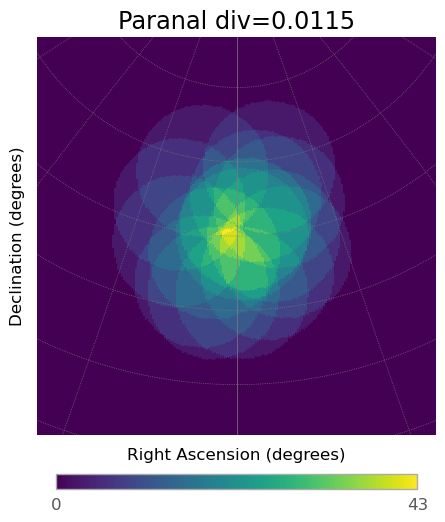

In [172]:
array_SST_2.divergent_pointing(div=0.0115, az=0, alt=70)
FoV=array_SST_2.hFoV(subarray_mult=number_of_telescopes_subarray_2)[0]
multiplicity=array_SST.hFoV(subarray_mult=number_of_telescopes_subarray_2)[1]
print(f"FoV {FoV}")
print(f"Multiplicity {multiplicity}")

array_SST_2.multiplicity_plot(subarray_mult=number_of_telescopes_subarray_2)


In [125]:
print(len(div), len(FoV_full_array), len(FoV_array))

8 8 8


In [126]:
## First to start understanding what is going on I wanted to graph in the 4 plots together 

In [127]:
FoV_array

[62.21264145127774,
 96.32205975118781,
 137.2900808080579,
 184.35609475591536,
 237.3496200730767,
 296.0608333482391,
 359.30947789282436,
 426.0857785399378]

## PENSAR COMO AUTOMIZAR LO SIGUIENTE EL FOV CHE STUDIO TIENE QUE SER SI O SI DEL FULL ARRAY CON EL MINIMO DEL ARRAY DE TELESCOPIOS QUE TENGO PRARA PODER CONFRONTAR MEJOR. En cambio no poner ningun limite para los subarrays

In [128]:
number_of_telescopes_subarray_1

[3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

# hFoV and multiplicities graphs 

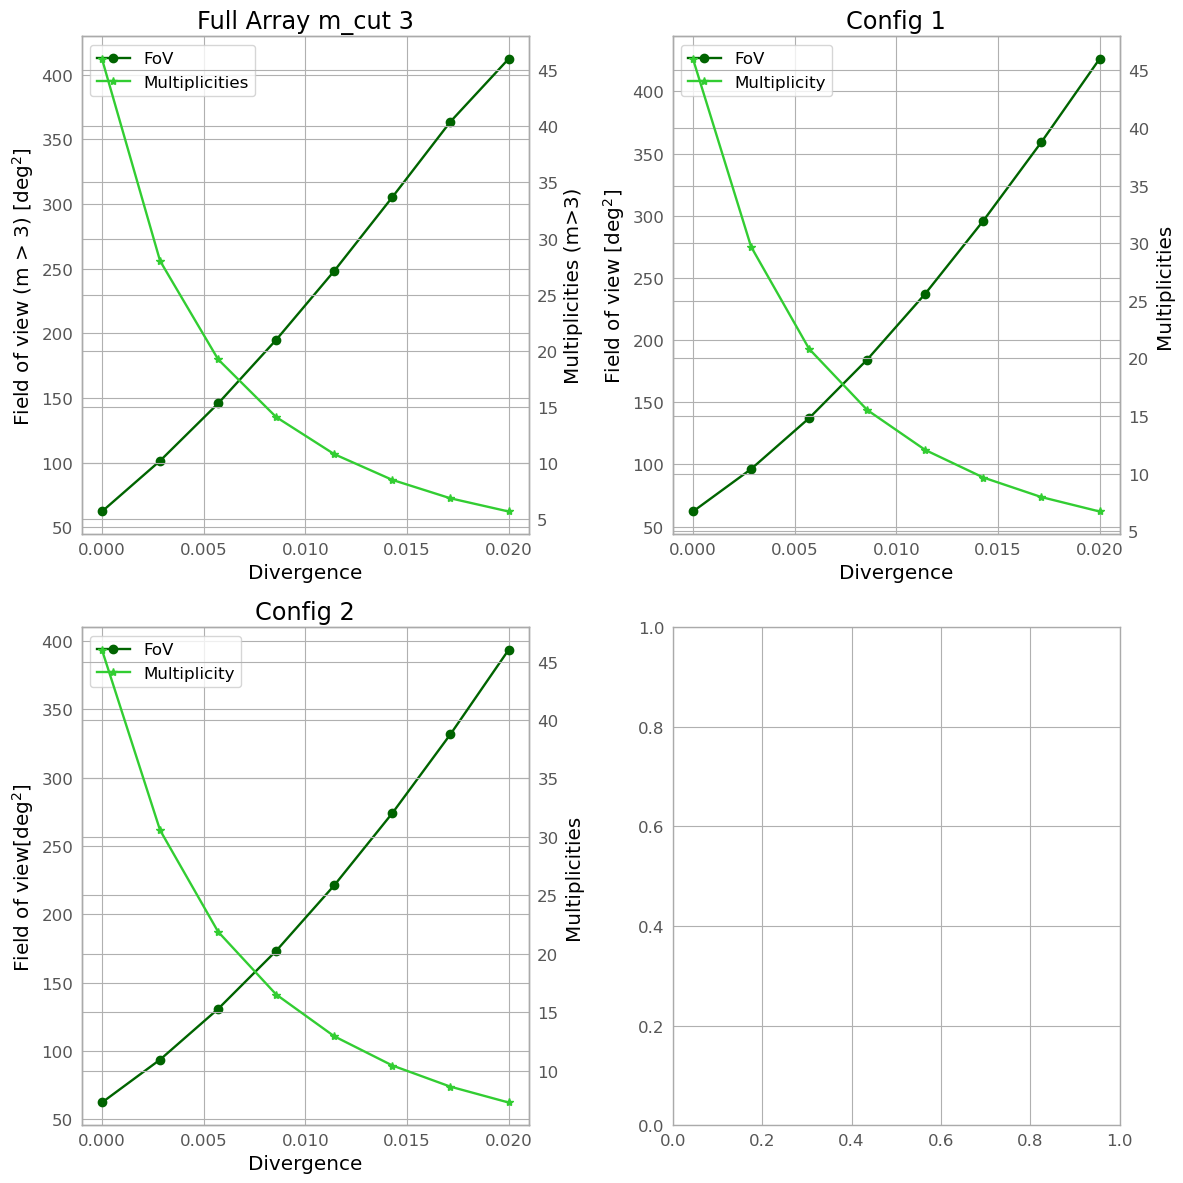

In [181]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12)) 
# Plot Full Array
# Full Array with m_cut = 3
l1=axes[0,0].plot(div, FoV_full_array, label='FoV', marker='o', color='darkgreen')
ax2 = axes[0,0].twinx()
l2=ax2.plot(div, multiplicity_full_array, label='Multiplicities',marker='*', color='limegreen')
axes[0,0].set_title('Full Array m_cut 3')
axes[0,0].set_xlabel('Divergence')
axes[0,0].set_ylabel('Field of view (m > 3) [deg$^2$]')
ax2.set_ylabel('Multiplicities (m>3)')
axeslegend = l1+l2
axes[0,0].legend(axeslegend, [l.get_label() for l in axeslegend])



#Plot the ones for subarray 1
l1=axes[0,1].plot(div, FoV_array, label='FoV',marker='o', color='darkgreen')
ax5=axes[0,1].twinx()
l2=ax5.plot(div, multiplicity_array, label='Multiplicity', marker='*', color='limegreen')
axes[0,1].set_title('Config 1')
axes[0,1].set_xlabel('Divergence')
axes[0,1].set_ylabel('Field of view [deg$^2$]')
ax5.set_ylabel('Multiplicities')
axeslegend = l1+l2
axes[0,1].legend(axeslegend, [l.get_label() for l in axeslegend])

#Plot the ones for subarray 2
l1=axes[1,0].plot(div, FoV_array_2, label='FoV',marker='o', color='darkgreen')
ax5=axes[1,0].twinx()
l2=ax5.plot(div, multiplicity_array_2, label='Multiplicity', marker='*', color='limegreen')
axes[1,0].set_title('Config 2')
axes[1,0].set_xlabel('Divergence')
axes[1,0].set_ylabel('Field of view[deg$^2$]')
ax5.set_ylabel('Multiplicities')
axeslegend = l1+l2
axes[1,0].legend(axeslegend, [l.get_label() for l in axeslegend])


# Adjust layout
plt.tight_layout()



plt.show()

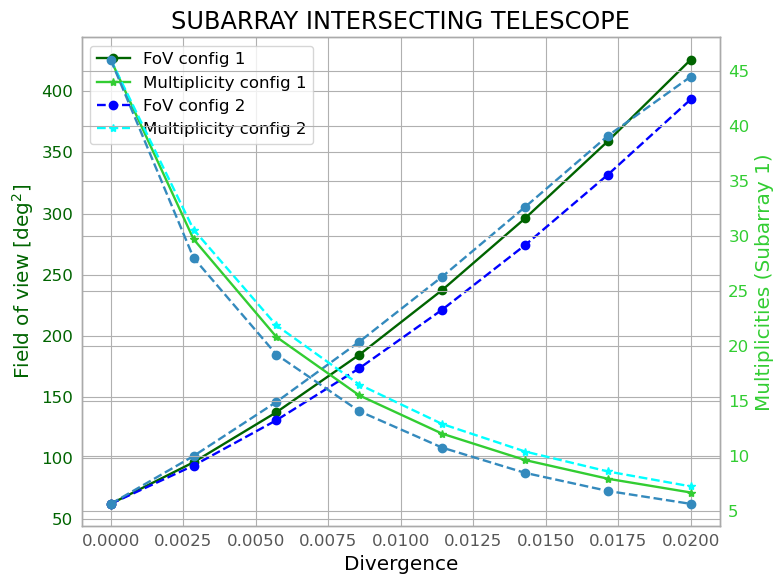

In [130]:
# Plot for subarray 1 on the primary y-axis
fig, ax1 = plt.subplots()
l1, = ax1.plot(div, FoV_array, label='FoV config 1', marker='o', color='darkgreen')
ax1.set_ylabel('Field of view [deg$^2$]', color='darkgreen')
ax1.tick_params(axis='y', labelcolor='darkgreen')

# Add secondary y-axis for multiplicity (subarray 1)
ax2 = ax1.twinx()
l2, = ax2.plot(div, multiplicity_array, label='Multiplicity config 1', marker='*', color='limegreen')

ax2.set_ylabel('Multiplicities (Subarray 1)', color='limegreen')
ax2.tick_params(axis='y', labelcolor='limegreen')

# Plot for subarray 2 on the same axes
l3, = ax1.plot(div, FoV_array_2, label='FoV config 2', marker='o', linestyle='--', color='blue')
l4, = ax2.plot(div, multiplicity_array_2, label='Multiplicity config 2', marker='*', linestyle='--', color='cyan')
#Plot the complete FoV

l5, = ax1.plot(div, FoV_full_array, label='FoV no subarrays', marker='o', linestyle='--')
l6, = ax2.plot(div, multiplicity_full_array, label='multiplicity no subarrays', marker='o', linestyle='--')
# Title and labels
ax1.set_title('SUBARRAY INTERSECTING TELESCOPE')
ax1.set_xlabel('Divergence')

# Combine legends from both y-axes
lines = [l1, l2, l3, l4]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Adjust layout for better readability
fig.tight_layout()

# Show plot
plt.show()

In [131]:
 FoV_full_array

[62.21264145127774,
 101.41027747528051,
 145.7617010394081,
 195.00463287953204,
 248.29977935044113,
 305.3455192983876,
 363.70265556697655,
 412.17186357792144]

In [132]:
multiplicity_full_array = np.array(multiplicity_full_array)

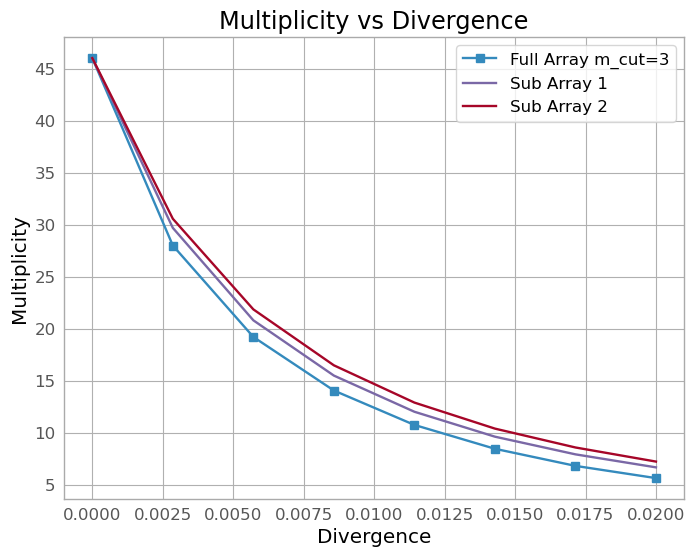

In [133]:
plt.plot(div, multiplicity_full_array, label='Full Array m_cut=3', marker='s')

plt.plot(div,  multiplicity_array, label='Sub Array 1')
plt.plot(div,  multiplicity_array_2, label='Sub Array 2')
#plt.plot(div[:10],  multiplicity_full_array_mult_cut_2[:10], label='Full Array m_cut=2', marker='s')
plt.xlabel("Divergence")  
plt.ylabel("Multiplicity")  # Y-axis label
plt.title("Multiplicity vs Divergence")  # Title of the plot
plt.legend()
plt.show()